In [38]:
# gtex = data.frame()
# for (i in 1:length(brain_tissues)){
#     t = brain_tissues[i]
#     r = res[[t]]
#     r$tissue = brain_tissues[i]
#     gtex = rbind(gtex,r)
# }
# head(gtex)

In [39]:
# gtex$tissue = gsub("_topsnp_allgenes_jan16.tsv","",gtex$tissue)
# gtex$eqtl = paste0(gtex$snp_id,"-",gtex$feature_id)
# gtex = gtex[gtex$p_value < 0.05,]

In [40]:
# length(unique(gtex$eqtl))

In [55]:
gtex_folder = "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/"
myfiles = list.files(gtex_folder,"signif")
myfiles = myfiles[grep("Brain",myfiles)]
gtex = data.frame()
for (file in myfiles){
#     print(file)
    r = read.csv(paste0(gtex_folder,file),sep='\t')
    r$tissue = gsub('v7.signif_variant_gene_pairs.txt','',file)
    gtex = rbind(gtex,r)
}
head(gtex)

variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta,tissue
1_780782_A_G_b37,ENSG00000225972.1,216340,2,2,0.0113636,1.25628e-06,2.78160,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.
1_920649_G_A_b37,ENSG00000225972.1,356207,2,2,0.0113636,1.25628e-06,2.78160,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.
1_1068882_C_T_b37,ENSG00000225972.1,504440,2,3,0.0170455,5.16947e-06,1.62513,0.327490,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.
1_1078090_T_C_b37,ENSG00000225972.1,513648,2,3,0.0170455,5.16947e-06,1.62513,0.327490,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.
1_1163773_C_T_b37,ENSG00000225972.1,599331,4,4,0.0227273,5.47505e-06,2.41209,0.487582,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.
1_1169637_T_C_b37,ENSG00000225972.1,605195,4,4,0.0227273,5.47505e-06,2.41209,0.487582,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.


In [56]:
# gtex_folder = "/hps/nobackup/hipsci/scratch/GTEx/GTEx_Analysis_v7_eQTL/"
# myfiles = list.files(gtex_folder,"egen")
# myfiles = myfiles[grep("Brain",myfiles)]
# gtex = data.frame()
# for (file in myfiles){
# #     print(file)
#     r = read.csv(paste0(gtex_folder,file),sep='\t')
#     r$tissue = gsub('.v7.egenes.txt','',file)
#     gtex = rbind(gtex,r)
# }
# head(gtex)

In [57]:
nrow(gtex)

[1] 4519254

In [67]:
df1 = gtex

In [68]:
df1$snp_id = gsub("_b37","",df1$variant_id)

In [69]:
df1$feature_id = gsub("\\.[0-9]","",df1$gene_id)
tail(df1)

,variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta,tissue,snp_id,feature_id
4519249,X_154943431_GA_G_b37,ENSG00000185973.6,43826,34,35,0.221519,8.38044e-06,0.790552,0.161695,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154943431_GA_G,ENSG00000185973
4519250,X_154946000_C_T_b37,ENSG00000185973.6,46395,62,72,0.450000,3.74818e-06,0.761406,0.148962,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154946000_C_T,ENSG00000185973
4519251,X_154947398_C_T_b37,ENSG00000185973.6,47793,34,35,0.218750,7.82404e-06,0.775772,0.158055,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154947398_C_T,ENSG00000185973
4519252,X_154947855_GC_G_b37,ENSG00000185973.6,48250,34,35,0.218750,7.82404e-06,0.775772,0.158055,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154947855_GC_G,ENSG00000185973
4519253,X_154949953_C_G_b37,ENSG00000185973.6,50348,34,35,0.218750,7.82404e-06,0.775772,0.158055,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154949953_C_G,ENSG00000185973
4519254,X_154950112_G_A_b37,ENSG00000185973.6,50507,62,72,0.450000,3.74818e-06,0.761406,0.148962,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154950112_G_A,ENSG00000185973


In [70]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv", row.names = 1)
# leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_old.csv")

head(leads,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [71]:
head(leads,2)
head(df1,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta,tissue,snp_id,feature_id
1_780782_A_G_b37,ENSG00000225972.1,216340,2,2,0.0113636,1.25628e-06,2.7816,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.,1_780782_A_G,ENSG00000225972
1_920649_G_A_b37,ENSG00000225972.1,356207,2,2,0.0113636,1.25628e-06,2.7816,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.,1_920649_G_A,ENSG00000225972


In [72]:
# df1 = df1[df1$qval < 0.05,]
df1$eqtl = paste0(df1$snp_id,"-",df1$feature_id)
length(unique(df1$eqtl))
eqtl1 = unique(df1$eqtl)

[1] 1431702

In [73]:
leads$eqtl = paste0(leads$snp_id,"-",leads$feature_id)
length(unique(leads$eqtl))
eqtl0 = unique(leads$eqtl)

[1] 11199

In [74]:
head(leads$eqtl)
head(df1$eqtl)

[1] "11_107726716_A_C-ENSG00000110660" "11_106001229_C_A-ENSG00000149313"
[3] "17_44368902_G_A-ENSG00000120071"  "17_43665322_C_T-ENSG00000120088" 
[5] "17_42773081_G_A-ENSG00000161692"  "17_42234039_T_A-ENSG00000168591"

[1] "1_780782_A_G-ENSG00000225972"  "1_920649_G_A-ENSG00000225972" 
[3] "1_1068882_C_T-ENSG00000225972" "1_1078090_T_C-ENSG00000225972"
[5] "1_1163773_C_T-ENSG00000225972" "1_1169637_T_C-ENSG00000225972"

In [75]:
length(unique(leads$eqtl))
sum(!(unique(leads$eqtl) %in% unique(df1$eqtl)))
length(unique(leads$feature_id))
sum(!(unique(leads$feature_id) %in% unique(df1$feature_id)))

[1] 11199

[1] 8799

[1] 4828

[1] 2366

In [76]:
head(leads,2)
head(df1,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label,eqtl
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11,11_107726716_A_C-ENSG00000110660
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11,11_106001229_C_A-ENSG00000149313


variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta,tissue,snp_id,feature_id,eqtl
1_780782_A_G_b37,ENSG00000225972.1,216340,2,2,0.0113636,1.25628e-06,2.7816,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.,1_780782_A_G,ENSG00000225972,1_780782_A_G-ENSG00000225972
1_920649_G_A_b37,ENSG00000225972.1,356207,2,2,0.0113636,1.25628e-06,2.7816,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.,1_920649_G_A,ENSG00000225972,1_920649_G_A-ENSG00000225972


In [77]:
nrow(leads[leads$q_value >0.05,])
nrow(df1[df1$qval >0.05,])

[1] 0

[1] 0

In [48]:
colnames(df1)

[1] "gene_id"                  "gene_name"               
 [3] "gene_chr"                 "gene_start"              
 [5] "gene_end"                 "strand"                  
 [7] "num_var"                  "beta_shape1"             
 [9] "beta_shape2"              "true_df"                 
[11] "pval_true_df"             "variant_id"              
[13] "tss_distance"             "chr"                     
[15] "pos"                      "ref"                     
[17] "alt"                      "num_alt_per_site"        
[19] "rs_id_dbSNP147_GRCh37p13" "minor_allele_samples"    
[21] "minor_allele_count"       "maf"                     
[23] "ref_factor"               "pval_nominal"            
[25] "slope"                    "slope_se"                
[27] "pval_perm"                "pval_beta"               
[29] "qval"                     "pval_nominal_threshold"  
[31] "log2_aFC"                 "log2_aFC_lower"          
[33] "log2_aFC_upper"           "tissue"                  
[35] "snp_id"                   "feature_id"              
[37] "eqtl"

In [93]:
df3 = leads[,c("eqtl","label")]
df4 = df1[,c("eqtl","pval_nominal","tissue")]
# colnames(df4)[4] = "snp_position"

In [94]:
c(nrow(df3), length(unique(df3$snp_id)), length(unique(df3$feature_id)), length(unique(df3$eqtl)))
c(nrow(df4), length(unique(df4$snp_id)), length(unique(df4$feature_id)), length(unique(df4$eqtl)))

[1] 15493     0     0 11199

[1] 4519254       0       0 1431702

In [95]:
library(dplyr)

In [96]:
# df3$eqtl = c()
# df4$eqtl = c()
df5 = inner_join(df3,df4, by = c("eqtl"),suffix = c(".neuro",".gtex"))
head(df5)

eqtl,label,pval_nominal,tissue
11_65653242_C_T-ENSG00000172500,FPP_D11,4.90396e-09,Brain_Anterior_cingulate_cortex_BA24.
11_65653242_C_T-ENSG00000172500,FPP_D11,3.04547e-08,Brain_Cortex.
11_65653242_C_T-ENSG00000172500,FPP_D11,2.79803e-08,Brain_Frontal_Cortex_BA9.
11_65664346_T_C-ENSG00000172638,FPP_D11,5.37625e-07,Brain_Cerebellar_Hemisphere.
11_65664346_T_C-ENSG00000172638,FPP_D11,5.41830e-10,Brain_Cerebellum.
11_65420760_C_G-ENSG00000172922,FPP_D11,3.91549e-09,Brain_Cortex.


In [97]:
nrow(df3)
nrow(df5)

[1] 15493

[1] 24562

In [101]:
length(unique(df5$eqtl))
df6 = df5[df5$pval_nominal<0.05,]
length(unique(df6$eqtl))

[1] 2400

[1] 2400

In [53]:
df5$dist = abs(df5$snp_position.neuro-df5$snp_position.gtex)

In [54]:
nrow(df5)
length(unique(df5[df5$dist > 100000,"eqtl.neuro"]))

[1] 49545

[1] 3627

In [42]:
# df0 = gtex
df0$snp_id = gsub("_b37","",df0$variant_id)

In [43]:
# df0$feature_id = gsub("\\.[0-9]","",df0$gene_id)
tail(df0)

,variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta,tissue,snp_id,feature_id
4519249,X_154943431_GA_G_b37,ENSG00000185973.6,43826,34,35,0.221519,8.38044e-06,0.790552,0.161695,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154943431_GA_G,ENSG00000185973
4519250,X_154946000_C_T_b37,ENSG00000185973.6,46395,62,72,0.450000,3.74818e-06,0.761406,0.148962,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154946000_C_T,ENSG00000185973
4519251,X_154947398_C_T_b37,ENSG00000185973.6,47793,34,35,0.218750,7.82404e-06,0.775772,0.158055,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154947398_C_T,ENSG00000185973
4519252,X_154947855_GC_G_b37,ENSG00000185973.6,48250,34,35,0.218750,7.82404e-06,0.775772,0.158055,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154947855_GC_G,ENSG00000185973
4519253,X_154949953_C_G_b37,ENSG00000185973.6,50348,34,35,0.218750,7.82404e-06,0.775772,0.158055,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154949953_C_G,ENSG00000185973
4519254,X_154950112_G_A_b37,ENSG00000185973.6,50507,62,72,0.450000,3.74818e-06,0.761406,0.148962,1.97309e-05,2.31291e-08,1.87966e-05,Brain_Substantia_nigra.,X_154950112_G_A,ENSG00000185973


In [44]:
head(leads,2)
head(df0,2)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,global_corr_p_value,label,eqtl
21_30373541_T_C,2.920966e-25,-0.8525780,0.08210206,1.632719e-14,21,30376705,30391699,173,173,...,21,30373541,C,1,0.2398844,0.09609073,ENSG00000156253,1.400559e-12,FPP_D11,21_30373541_T_C-ENSG00000156253
21_30432557_G_A,1.495486e-48,0.5058675,0.03454695,1.169470e-31,21,30428126,30446118,173,173,...,21,30432557,A,1,0.1358382,1.00000000,ENSG00000156261,1.059433e-28,FPP_D11,21_30432557_G_A-ENSG00000156261


variant_id,gene_id,tss_distance,ma_samples,ma_count,maf,pval_nominal,slope,slope_se,pval_nominal_threshold,min_pval_nominal,pval_beta,tissue,snp_id,feature_id
1_780782_A_G_b37,ENSG00000225972.1,216340,2,2,0.0113636,1.25628e-06,2.7816,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.,1_780782_A_G,ENSG00000225972
1_920649_G_A_b37,ENSG00000225972.1,356207,2,2,0.0113636,1.25628e-06,2.7816,0.521409,1.05226e-05,1.25628e-06,0.00141162,Brain_Amygdala.,1_920649_G_A,ENSG00000225972


In [ ]:
df0 = df0[df0$]

In [45]:
df0$eqtl = paste0(df0$snp_id,"-",df0$feature_id)
length(unique(df0$eqtl))
eqtl1 = unique(df0$eqtl)

[1] 1431702

In [46]:
sum(eqtl0 %in% eqtl1)

[1] 1697

In [46]:
celltypes = unique(leads$new_label)
mat = matrix(0,nrow = length(brain_tissues),ncol = length(celltypes))

In [54]:
celltypes

[1] FPP_D11       P_FPP_D11     DA_D30        Sert_D30      Epen1_D30    
 [6] FPP_D30       DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_ROT_D52    Sert_ROT_D52  Epen1_ROT_D52 Astro_ROT_D52
14 Levels: Astro_D52 Astro_ROT_D52 DA_D30 DA_D52 DA_ROT_D52 ... Sert_ROT_D52

In [49]:
# library(dplyr)

In [52]:
for (j in 1:length(celltypes)){
# for (j in 1){
    celltype = as.character(celltypes[j])
#     print(celltype)
    l = leads[leads$new_label == celltype,]
    for (i in 1:length(brain_tissues)){
#     for (i in 1){
        t = brain_tissues[i]
#         print(t)
        r = res[[t]]
        df = inner_join(l,r,by = c("snp_id","feature_id"), suffix = c("",".gtex"))
#         print(nrow(df))
        mat[i,j] = nrow(df[df$p_value.gtex < 0.05,])/nrow(df)
#         print(mat[i,j])
    }
}

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with differe

“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coerci

“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `feature_id` joining factors with different levels, coerci

In [53]:
mat

0.3431373,0.3537415,0.4491525,0.5324675,0.4655172,0.5757576,0.5000000,0.5691057,0.5564516,0.7500,0.6341463,0.6046512,0.5434783,0.8666667
0.3750000,0.4104308,0.5254237,0.5844156,0.5258621,0.5656566,0.5106383,0.5447154,0.5920000,0.8125,0.6341463,0.6162791,0.5978261,0.7333333
0.4373464,0.4852608,0.5847458,0.6233766,0.5344828,0.6565657,0.5851064,0.6097561,0.6854839,0.7500,0.6341463,0.6395349,0.6304348,0.8000000
0.4433498,0.4863636,0.5677966,0.6103896,0.5517241,0.6464646,0.6489362,0.6229508,0.6666667,0.8125,0.7073171,0.6705882,0.5652174,0.6666667
0.4191176,0.4693878,0.6101695,0.5844156,0.5603448,0.6060606,0.5638298,0.6422764,0.6000000,0.6875,0.7317073,0.6395349,0.6195652,0.7333333
0.3602941,0.3990930,0.4915254,0.4805195,0.4396552,0.5555556,0.5319149,0.5934959,0.5680000,0.6875,0.6829268,0.6046512,0.6195652,0.6000000
0.4103194,0.4603175,0.5762712,0.5844156,0.5431034,0.6464646,0.6063830,0.5853659,0.6290323,0.8125,0.7073171,0.6395349,0.5543478,0.7333333
0.4963145,0.5272727,0.6525424,0.5974026,0.5689655,0.7070707,0.6702128,0.6557377,0.6910569,0.7500,0.6829268,0.6470588,0.6739130,0.8000000
0.4201474,0.4580499,0.5254237,0.5584416,0.4568966,0.6363636,0.5744681,0.5691057,0.6422764,0.7500,0.6829268,0.6279070,0.6195652,0.7333333
0.3259804,0.3628118,0.4322034,0.4805195,0.4568966,0.5656566,0.5212766,0.5365854,0.5564516,0.7500,0.5853659,0.5000000,0.5978261,0.6000000
0.4485294,0.4897959,0.6440678,0.5974026,0.5431034,0.6666667,0.6170213,0.6341463,0.6693548,0.7500,0.7317073,0.6162791,0.6739130,0.6666667


In [57]:
celltypes

[1] FPP_D11       P_FPP_D11     DA_D30        Sert_D30      Epen1_D30    
 [6] FPP_D30       DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_ROT_D52    Sert_ROT_D52  Epen1_ROT_D52 Astro_ROT_D52
14 Levels: Astro_D52 Astro_ROT_D52 DA_D30 DA_D52 DA_ROT_D52 ... Sert_ROT_D52

In [65]:
mat_to_plot = mat
rownames(mat_to_plot) = brain_tissues
colnames(mat_to_plot) = celltypes

In [66]:
head(mat_to_plot)

,FPP_D11,P_FPP_D11,DA_D30,Sert_D30,Epen1_D30,FPP_D30,DA_D52,Sert_D52,Epen1_D52,Astro_D52,DA_ROT_D52,Sert_ROT_D52,Epen1_ROT_D52,Astro_ROT_D52
brain_amygdala_topsnp_allgenes_jan16.tsv,0.3431373,0.3537415,0.4491525,0.5324675,0.4655172,0.5757576,0.5000000,0.5691057,0.5564516,0.7500,0.6341463,0.6046512,0.5434783,0.8666667
brain_anterior_cingulate_cortex_topsnp_allgenes_jan16.tsv,0.3750000,0.4104308,0.5254237,0.5844156,0.5258621,0.5656566,0.5106383,0.5447154,0.5920000,0.8125,0.6341463,0.6162791,0.5978261,0.7333333
brain_caudate_basal_ganglia_topsnp_allgenes_jan16.tsv,0.4373464,0.4852608,0.5847458,0.6233766,0.5344828,0.6565657,0.5851064,0.6097561,0.6854839,0.7500,0.6341463,0.6395349,0.6304348,0.8000000
brain_cerebellar_hemisphere_topsnp_allgenes_jan16.tsv,0.4433498,0.4863636,0.5677966,0.6103896,0.5517241,0.6464646,0.6489362,0.6229508,0.6666667,0.8125,0.7073171,0.6705882,0.5652174,0.6666667
brain_frontal_cortex_topsnp_allgenes_jan16.tsv,0.4191176,0.4693878,0.6101695,0.5844156,0.5603448,0.6060606,0.5638298,0.6422764,0.6000000,0.6875,0.7317073,0.6395349,0.6195652,0.7333333
brain_hypothalamus_topsnp_allgenes_jan16.tsv,0.3602941,0.3990930,0.4915254,0.4805195,0.4396552,0.5555556,0.5319149,0.5934959,0.5680000,0.6875,0.6829268,0.6046512,0.6195652,0.6000000


In [69]:
library(tidyr)
library(ggplot2)
# library(dplyr)
options(repr.plot.width=8, repr.plot.height=6)
df = as.data.frame(mat_to_plot) %>% 
  gather(key="CellType", value="Sharing")

head(df,2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


CellType,Sharing
FPP_D11,0.3431373
FPP_D11,0.3750000


In [74]:
celltypes

[1] FPP_D11       P_FPP_D11     DA_D30        Sert_D30      Epen1_D30    
 [6] FPP_D30       DA_D52        Sert_D52      Epen1_D52     Astro_D52    
[11] DA_ROT_D52    Sert_ROT_D52  Epen1_ROT_D52 Astro_ROT_D52
14 Levels: Astro_D52 Astro_ROT_D52 DA_D30 DA_D52 DA_ROT_D52 ... Sert_ROT_D52

In [71]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
# col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

In [75]:
head(df)

CellType,Sharing
FPP_D11,0.3431373
FPP_D11,0.3750000
FPP_D11,0.4373464
FPP_D11,0.4433498
FPP_D11,0.4191176
FPP_D11,0.3602941


In [81]:
df = df %>% mutate(CellType = factor(CellType, levels=celltypes))

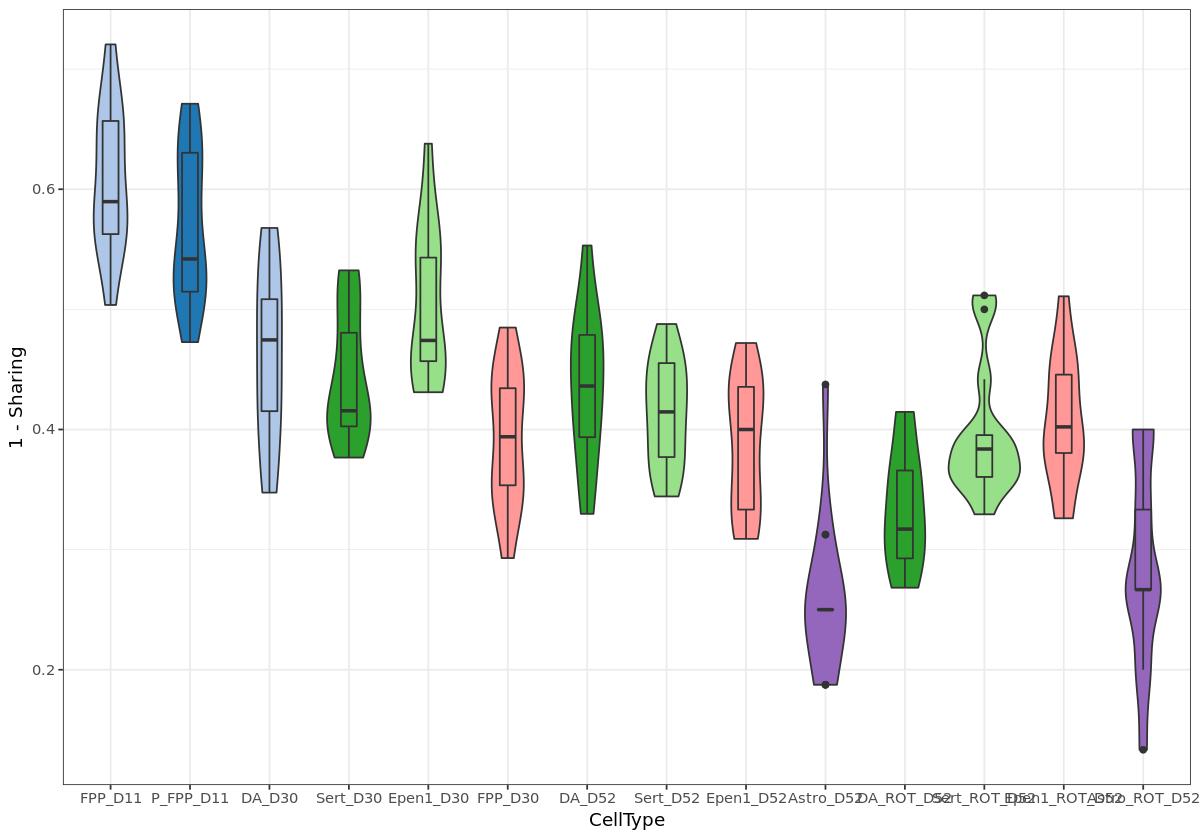

In [84]:
options(repr.plot.width=10, repr.plot.height=7)
ggplot(df,aes(x=CellType, y=1-Sharing, fill=CellType)) +  
    geom_violin() + 
    geom_boxplot(width = 0.2) + scale_fill_manual(values = c(col_FPP,col_P_FPP,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none") 